## Goal
-------------------------------------------------------
* 다음 분기에 어떤 게임을 설계해야 할까?

## 반드시 들어가야 하는 내용.
-------------------------------------------
- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

## Data Description
--------------------------------------
- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 배급한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

# IMPORT

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


# 전처리

In [92]:
df = pd.read_csv('vgames2.csv')

# unamed 컬럼 삭제
df = df[[ 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [93]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


## Year수정

In [95]:
# Year, Genre, Publisher에서 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [96]:
# Year에 대한 결측치는 대체할 값을 찾을 수 없다.
df[df['Year'].isnull()]
# Genre는 일일히 찾아서 기록할 수 있겠지만 이 데이터셋 안에서 결측치를 유추할 수 없다.
df[df['Genre'].isnull()]
# Genre와 동일
df[df['Publisher'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2970,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0,0,0.06,0
3184,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0,0.01
3412,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0


In [97]:
df.shape

(16598, 9)

In [98]:
# 중복값 확인 및 제거
df[df.duplicated()]
df = df.drop_duplicates()

In [99]:
df.shape

(16597, 9)

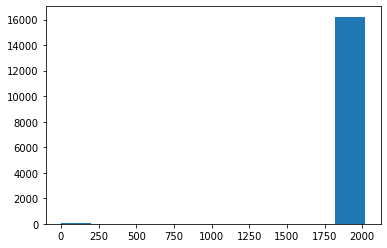

In [100]:
plt.hist(df['Year']) 
plt.show()

In [101]:
df1 = df.query("Year < 100")
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,0.02,0
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [102]:
# Year 수정
def function(row):
    if row['Year'] > 50 and row['Year'] < 100:
        return row['Year'] + 1900
    elif row['Year'] < 50 and row['Year'] < 100:
        return row['Year'] + 2000
    else:
        return row['Year']

df['Year'] = df.apply(function, axis = 1)
# df.loc[df.Name == 'Super Robot Taisen F Kanketsuhen']

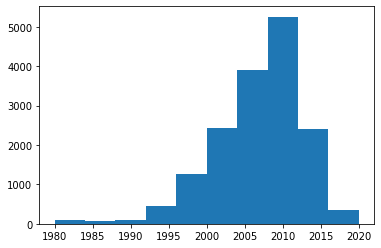

In [103]:
plt.hist(df['Year']) 
plt.show()

## Sales 수정

In [104]:
df.tail(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16588,MindJack,PS3,2011.0,Shooter,Square Enix,0.07,0.08,0,0.03
16589,Namco Soccer Prime Goal,PS,1995.0,Sports,Sony Computer Entertainment,0,0,0.12,0.01
16590,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0,0,0.05,0
16591,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16592,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0,0,0.02,0
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16597,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [105]:
# 숫자 이외에 K값이 있으면 0.001를 곱하고
# M이 있으면 문자를 없앤다.
def change_values(row):
    if 'K' in row:
        return float(row[0:-1])*0.001
    elif 'M' in row:
        return float(row[0:-1])
    else:
        return float(row)


In [106]:
df.NA_Sales = df.NA_Sales.apply(change_values)
df.EU_Sales = df.EU_Sales.apply(change_values)
df.JP_Sales = df.JP_Sales.apply(change_values)
df.Other_Sales = df.Other_Sales.apply(change_values)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


## 결측치 대체 및 제거

In [108]:
a=df[df.isna().any(axis=1)]

a

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.00,0.00
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01
...,...,...,...,...,...,...,...,...,...
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00
16431,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0.00,0.00,0.01
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0.00,0.00,0.01
16555,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0.00,0.03,0.00,0.01


In [109]:
df[df.Name == "Jewel Link Chronicles: Mountains of Madness"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.0,0.06,0.0,0.01


### 1. Year결측치 대체 및 제거

In [110]:
# NULL 값이 있는 것중 채울 수 있는 것들을 채워보자
# 데이터 중에서 게임은 같지만 출판사가 다른 데이터가 있다
# NULL값을 다른 데이터를 통해 채워보도록 하자

# 대체하기 전 Year의 Null의 갯수 270개
Year_Na = a=df[df.Year.isna()]
Year_Na.Name

31                                         Rock Band
109       Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)
273      Jewel Link Chronicles: Mountains of Madness
358               Majesty 2: The Fantasy Kingdom Sim
430                                       Famista 64
                            ...                     
16240                                  Freaky Flyers
16275                                 Space Invaders
16278                                  Madden NFL 11
16425                                 Yoostar on MTV
16432                                    Bejeweled 3
Name: Name, Length: 270, dtype: object

In [111]:
# Name이 같은 데이터가 2개 이상 있다면 Year의 평균을 구해 NaN값을 대체한다.
for i in Year_Na.Name:
    if list(df.Name).count(i) > 1:
        value = round((df[df.Name == i].Year).mean(),0)
        df['Year']  = np.where(df['Name'] == i, value, df['Year'])

In [112]:
# 대체 후 Year의 Null의 갯수 146개
Year_Na = a=df[df.Year.isna()]
Year_Na.Name

# 이들은 Year를 알 수 없으므로 drop한다.
df.dropna(subset=['Year'], inplace = True)

In [113]:
# df_clean.Year.isnull().sum()
df.Year.isnull().sum()

0

### 2. Genre 결측치 대체 및 제거

In [114]:
# 대체하기 전 Genre의 Null의 갯수 50개
Genre_Na =df[df.Genre.isna()]
Genre_Na.Name
# len(Genre_Na.Name)

50                          Ape Escape: On the Loose
408                                      NBA Ballers
1328                                      NFL Street
1582                  SingStar Singalong With Disney
1971                             Pokemon X/Pokemon Y
2043                                   NASCAR Racing
2497                Jurassic Park III: Island Attack
3353                     The Godfather: Dons Edition
3363                    Ski-Doo Snowmobile Challenge
3470              Batman Beyond: Return of the Joker
3515        Princess Saver! Eternal Love for My Lady
3932                               MVP Baseball 2004
4148                             Grand Theft Auto IV
4349                       Brain Quest: Grades 5 & 6
4545               Dragon Ball Z: Ultimate Tenkaichi
4598                                       Wii Party
4935                                Astonishia Story
5668                                    Chrono Cross
5713                    Back to the Future: Th

In [115]:
# Name이 같은 데이터가 2개 이상 있다면 Genre를 대체한다
for i in Genre_Na.Name:
    if list(df.Name).count(i) > 1:
        # Nan이 아닌 값을 추출
        genre = df[df.Name == i].Genre.mode(dropna=True)[0]
        df['Genre']  = np.where(df['Name'] == i, genre, df['Genre'])

In [117]:
Genre_Na =df[df.Genre.isna()]
len(Genre_Na.Name)

30

In [119]:
# 나머지는 Genre를 알 수 없으므로 drop한다.
df.dropna(subset=['Genre'], inplace = True)

In [120]:
df.Genre.isnull().sum()

0

### Publisher 결측치 대체 및 제거

In [121]:
# 대체하기 전 Publisher의 Null 갯수 42개
Publisher_Na =df[df.Publisher.isna()]
Publisher_Na.Name
# len(Publisher_Na.Name)

272                                     UK Truck Simulator
1313        All Grown Up!: Game Boy Advance Video Volume 1
1560     Teenage Mutant Ninja Turtles: Game Boy Advance...
1789     Nicktoons Collection: Game Boy Advance Video V...
1879                        Monster Hunter Frontier Online
1961     Nicktoons Collection: Game Boy Advance Video V...
2070                                        World of Tanks
3412                                     Dance with Devils
3684       Dragon Ball GT: Game Boy Advance Video Volume 1
4367     Strawberry Shortcake: Game Boy Advance Video V...
5207     Cartoon Network Collection: Game Boy Advance V...
5245     Cartoon Network Collection: Game Boy Advance V...
5387     Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...
6392                           Brothers in Arms: Furious 4
7370                                          Stronghold 3
7984                      Disney Channel Collection Vol. 1
8038     Super Robot Monkey Team: Game Boy Advance Vide.

In [29]:
# 게임의 이름이 같아도 Publisher가 같다고 할 수 있을까?
# for i in Publisher_Na.Name:
#     if list(df.Name).count(i) > 1:
#         # Nan이 아닌 값을 추출
#         publisher = df[df.Name == i].Publisher.mode(dropna=True)[0]
#         df['Publisher']  = np.where(df['Name'] == i, publisher, df['Publisher'])

In [122]:
Publisher_Na =df[df.Publisher.isna()]
Publisher_Na.Name
len(Publisher_Na.Name)

42

In [123]:
# 나머지 Publisher를 알 수 없으므로 drop한다.
df.dropna(subset=['Publisher'], inplace = True)

In [124]:
df.Publisher.isnull().sum()

0

## 최종 Dataframe


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16379 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16379 non-null  object 
 1   Platform     16379 non-null  object 
 2   Year         16379 non-null  float64
 3   Genre        16379 non-null  object 
 4   Publisher    16379 non-null  object 
 5   NA_Sales     16379 non-null  float64
 6   EU_Sales     16379 non-null  float64
 7   JP_Sales     16379 non-null  float64
 8   Other_Sales  16379 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [127]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


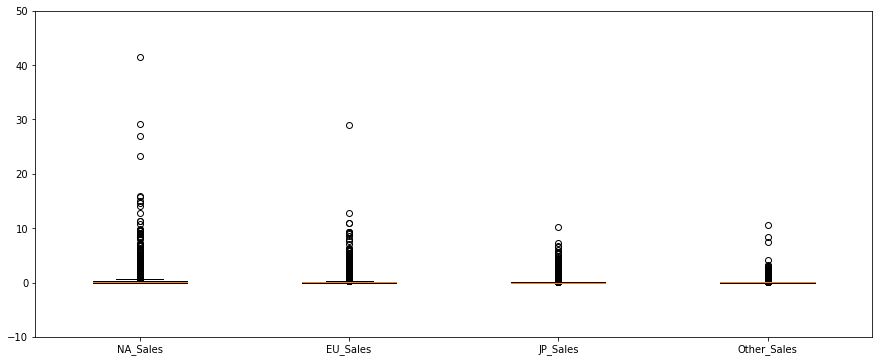

In [128]:
#boxplot을 이용하여 float 칼럼들의 분포확인

plt.figure(figsize=(15,6))
plt.boxplot([df['NA_Sales'],df['EU_Sales'],df['JP_Sales'],df['Other_Sales']])
plt.ylim((-10,50))
plt.xticks([1, 2, 3, 4], 

           ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.show()
# 대부분의 출고량이 0~0.1M에 집중되어 있다. 

In [129]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16379.000000,16379.000000,16379.000000,16379.000000,16379.000000
mean,2006.410465,0.265306,0.147288,0.077739,0.048218
std,5.819167,0.820206,0.506804,0.308102,0.189061
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [130]:
# NA 와 EU에서 출고량 1위를 기록한 게임
df[df.NA_Sales == max(df.NA_Sales)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46


# Feature Enginering

In [131]:
#모든 출고량을 나타내주는 total 칼럼 생성

df['total'] = df['NA_Sales'] + df['JP_Sales'] + df['EU_Sales'] + df['Other_Sales']

In [132]:
df['total'].describe()

count    16379.000000
mean         0.538551
std          1.558730
min          0.000000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: total, dtype: float64

In [133]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16379 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16379 non-null  object 
 1   Platform     16379 non-null  object 
 2   Year         16379 non-null  float64
 3   Genre        16379 non-null  object 
 4   Publisher    16379 non-null  object 
 5   NA_Sales     16379 non-null  float64
 6   EU_Sales     16379 non-null  float64
 7   JP_Sales     16379 non-null  float64
 8   Other_Sales  16379 non-null  float64
 9   total        16379 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


# 분석 및 결과

In [40]:
nasale_total = df['NA_Sales'].sum()
eusale_total = df['EU_Sales'].sum()
jpsale_total = df['JP_Sales'].sum()
othersale_total = df['Other_Sales'].sum()

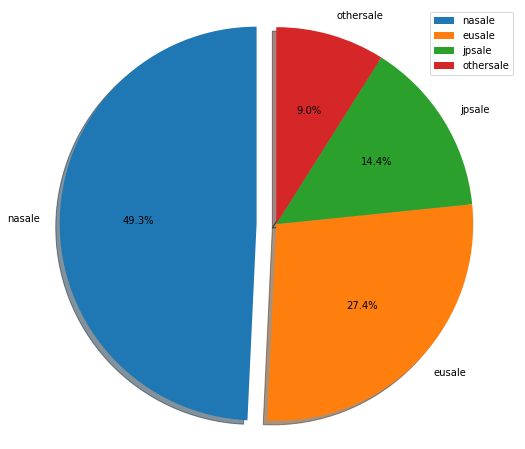

In [41]:
# 지역에 따라서 출판량이 다를까? 
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'nasale', 'eusale', 'jpsale','othersale'
sizes = [nasale_total, eusale_total, jpsale_total,othersale_total]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1 = plt.figure(figsize=(9,8))
fig1.set_facecolor('white')
ax1= fig1.add_subplot()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend() ## 범례 표시
plt.show()

NA에서 출판률 49.3%로 약 50%를 차지하고 있고 EU,JP순으로 출판률이 많다.
NA의 시장이 젤 커, 공략해야 될 우선순위로 둬야한다. 또한 게임의 언어 지원에서 영어는 빠지지 말아야한다.

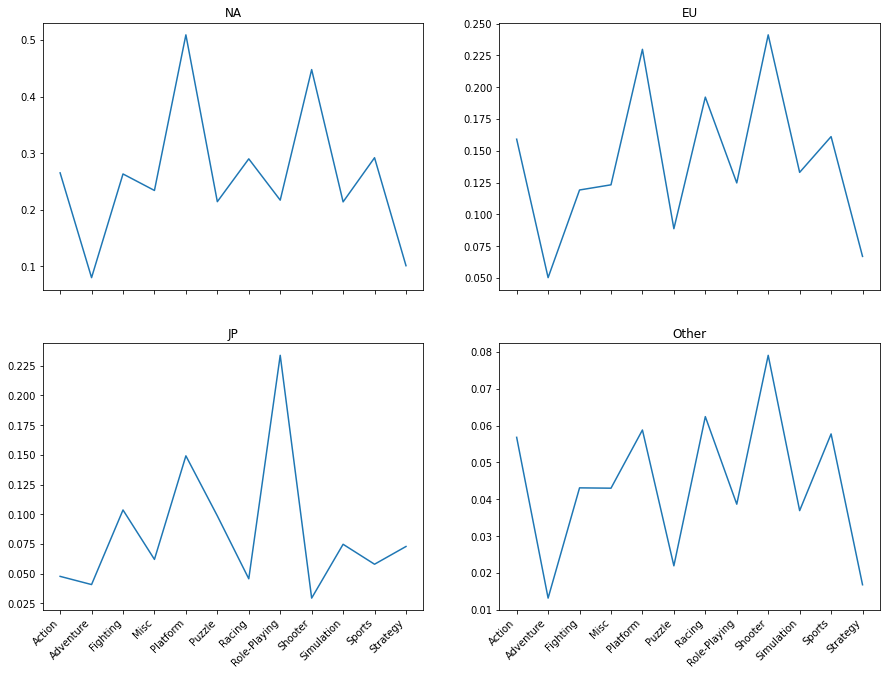

In [42]:
# 지역에 따라서 선호하는 게임 장르가 다를까?
nasale = df.groupby('Genre')['NA_Sales'].mean()
eusale = df.groupby('Genre')['EU_Sales'].mean()
jpsale = df.groupby('Genre')['JP_Sales'].mean()
othersale = df.groupby('Genre')['Other_Sales'].mean()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,12))

ax[0,0].plot(nasale)
ax[0,0].set_title('NA')

ax[0,1].plot(eusale)
ax[0,1].set_title('EU')

ax[1,0].plot(jpsale)
ax[1,0].set_title('JP')

ax[1,1].plot(othersale)
ax[1,1].set_title('Other')

fig.autofmt_xdate (rotation = 45) #한번에 x축 레이블 돌려주기

plt.show()

NA - platform과 Shooter 장르의 출고량이 제일 많다
EU - platform과 Shooter 장르의 출고량이 제일 많다. 그 다음으로 Racing이 많다.
JP - Role-Playing이 제일 많다. 그 다음으로 platform, Fighting 순으로 이어진다.
Other - Shooter가 제일 많다. 그 다음으로 Racing, Platform순으로 이어진다.

JP는 다른 지역과 비교해 장르별 출고량의 패턴이 다르다.<br>
NA,EU,Other의 장르 선호도는 유사하다. 

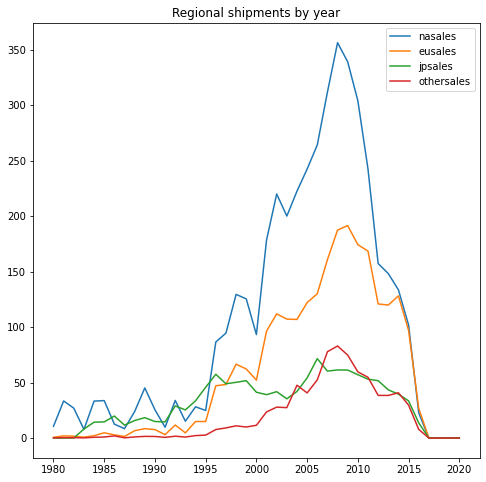

In [43]:
# 연도별 게임의 트렌드가 있을까?
plt.figure(figsize = (8,8))
plt.plot(df.groupby('Year')['NA_Sales'].sum(), label = 'nasales')
plt.plot(df.groupby('Year')['EU_Sales'].sum(), label = 'eusales')
plt.plot(df.groupby('Year')['JP_Sales'].sum(), label = 'jpsales')
plt.plot(df.groupby('Year')['Other_Sales'].sum(), label = 'othersales')
# 지역에 따른 연도별 출고량
plt.title('Regional shipments by year')
plt.legend()
plt.show()

지역별로 출고량의 패턴이 다르지만<br>
2010년 전까진 출고량의 상승이 이어진다가<br>
그 이후로 출고량이 꺾이는 패턴을 보인다. 

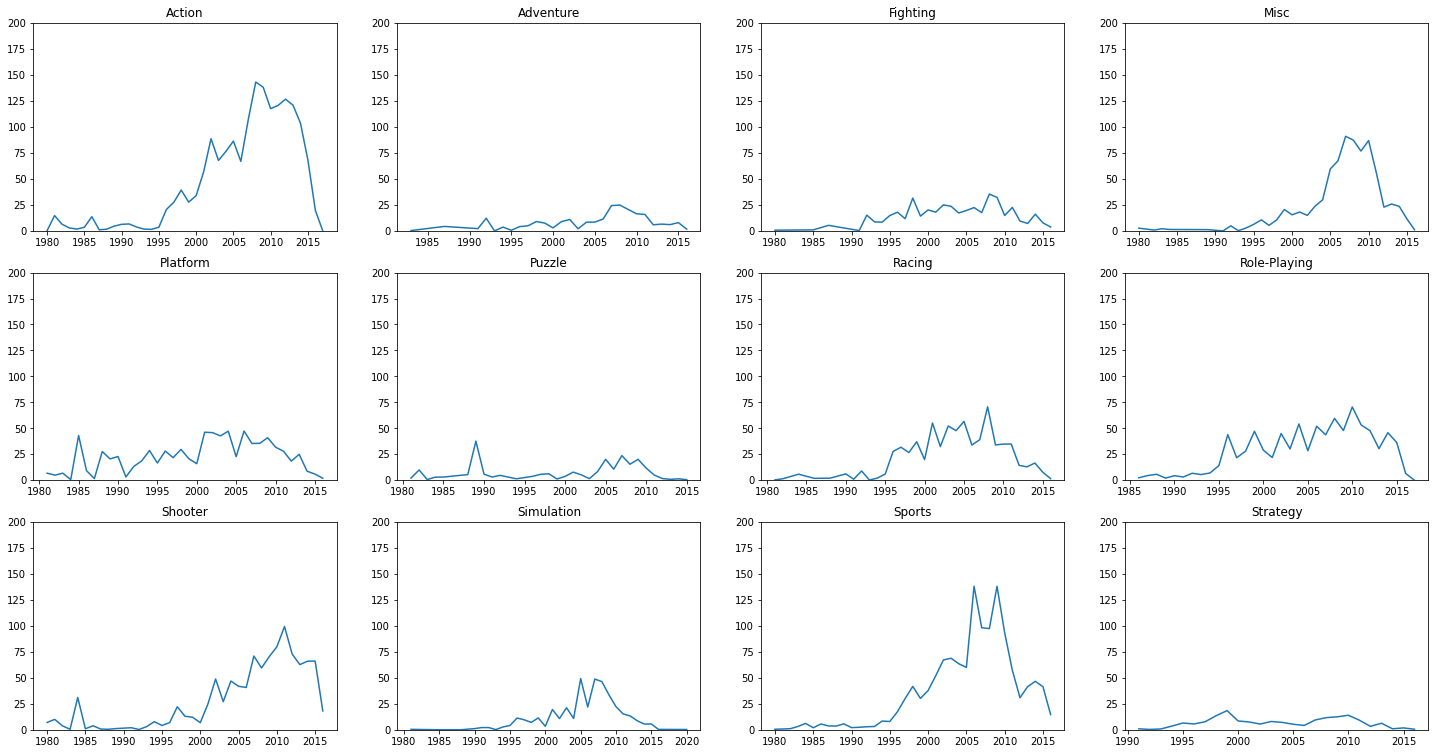

In [44]:
# 연도별 비디오 게임 장르의 트렌드

gen = list(df['Genre'].unique())

gen.sort()

fig2, ax2 = plt.subplots(3,4, figsize=(25,13))

for i, ge in enumerate(gen): #row 설정
    if i <= 3:
        r = 0
    elif i > 3 and i <= 7:
        r = 1
    elif i > 7 and i <= 11:
        r = 2

    j = i % 4 #column 설정

    df1 = df[df['Genre'] == ge]

    df1 = df1.groupby('Year')['total'].sum()

    ax2[r,j].plot(df1)
    ax2[r,j].set_title(ge)
    ax2[r,j].set_ylim(0,200)
plt.show()

In [45]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스

big_game = df.copy()

big_game.index = big_game['Name']

print('모든 시기의 출고량 상위 5종목 : \n', big_game['total'].nlargest(5)) #상위 5개 출고량 높은 게임
print('\n최근 출고량 상위 5종목 : \n', big_game[big_game['Year'] >= 2015]['total'].nlargest(5))

모든 시기의 출고량 상위 5종목 : 
 Name
Wii Sports                  82.74
Super Mario Bros.           40.24
Mario Kart Wii              35.83
Wii Sports Resort           33.00
Pokemon Red/Pokemon Blue    31.38
Name: total, dtype: float64

최근 출고량 상위 5종목 : 
 Name
Call of Duty: Black Ops 3       14.24
FIFA 16                          8.49
Star Wars Battlefront (2015)     7.67
Call of Duty: Black Ops 3        7.29
Fallout 4                        6.96
Name: total, dtype: float64


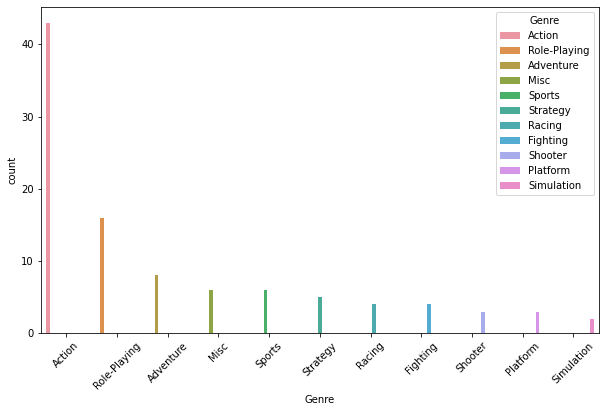

In [65]:
#최근 트랜드를 반영한 출시가 많이 되는 장르
best = big_game[big_game['Year'] >= 2015].iloc[:100]['Genre'].value_counts()
best = pd.DataFrame(best)
best.reset_index(inplace = True)
best.columns = ['Genre', 'count']

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(
    x = 'Genre',
    y = 'count',
    data = best,
    hue = 'Genre'
);


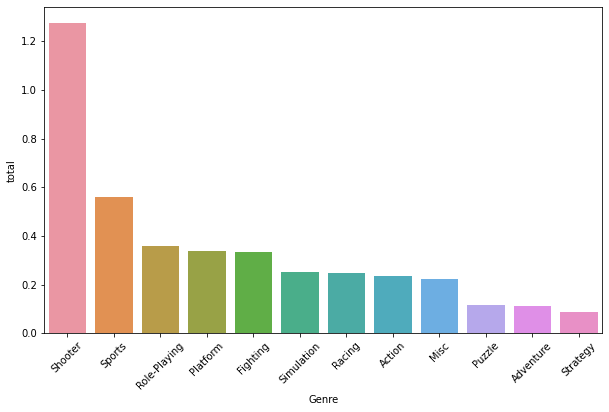

In [56]:
#최근 장르별 출고량 평균 순위

Genre_total_trend = pd.DataFrame(big_game[big_game['Year']>=2015].groupby('Genre')['total'].mean())
Genre_total_trend.reset_index(inplace = True)
Genre_total_trend.sort_values('total', ascending = False, inplace = True)

plt.figure(figsize = (10,6))
plt.xticks(rotation=45)
sns.barplot(
    x='Genre',
    y='total',
    data=Genre_total_trend
);


출고량에서는 Shooter, Sports, Role-Playing이 상위권에 속해있다.

In [49]:
# 출고량 상위 3 Genre 평균 비교, Shooter, Sports, Role-Playing 과연 sales에서 유의미한 차이가 있을까?(ANOVA)

trend = big_game[big_game['Year'] >= 2015] #trend반영

group1 = trend[trend['Genre'] == 'Shooter']['total']
group2 = trend[trend['Genre'] == 'Sports']['total']
group3 = trend[trend['Genre'] == 'Role-Playing']['total']

#Shooter, Sports , Role-playing ANOVA
p_value_ano = stats.f_oneway(group1, group2, group3).pvalue

if p_value_ano >= 0.05:
    print('Shooter, Sports, Role-Playing 세 그룹간 평균이 유의미하게 차이나지 않습니다.')
else:
    print('Shooter, Sports, Role-Playing 세 그룹간 평균이 적어도 하나는 유의미하게 차이납니다.')

Shooter, Sports, Role-Playing 세 그룹간 평균이 적어도 하나는 유의미하게 차이납니다.


In [50]:
# Shooter, Sports t-test, 두 데이터는 연관성이 없다고 판단

#표본이 많으므로 정규성을 만족한다고 생각

#등분산 test
p_value_var = stats.levene(group1, group2).pvalue

if p_value_var >= 0.05:
    print('Shooter, Sports 두 그룹은 등분산이다.')
else:
    print('Shooter, Sports 두 그룹은 등분산이 아니다.')

#독립 t-test, 단측검정:
p_value_t = stats.ttest_ind(group1, group2, equal_var = False, alternative = 'greater').pvalue

if p_value_t >= 0.05:
    print('Shooter, Sports 두 그룹간 평균이 유의미하게 차이나지 않습니다.')
else:
    print('Shooter, Sports 두 그룹간 평균이 Shooter가 더 크다.')

Shooter, Sports 두 그룹은 등분산이 아니다.
Shooter, Sports 두 그룹간 평균이 Shooter가 더 크다.


In [51]:
#최근 shooter를 통한 CI 계산
avg = np.mean(group1)
se = np.std(group1)/np.sqrt(len(group1))

ci = stats.t.interval(.95, loc = avg, scale = se, df = len(group1)-1)

print('Shooter 평균 출고량의 confidence interval : ', (round(ci[0],3), round(ci[1], 3)))

Shooter 평균 출고량의 confidence interval :  (0.72, 1.834)


위 ANOVA, t-test의 결과를 보았을 때, 최근에는 전세계적으로 shooter 장르의 게임의 출고량의 평균이 가장 높다는 것을 볼 수 있다. 

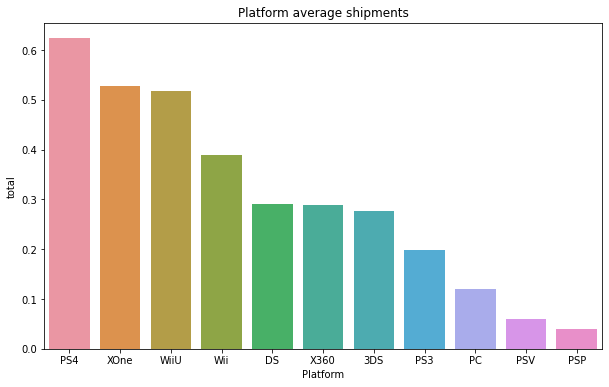

In [139]:
# 그렇다면 어떤 플랫폼에 맡겨야 할까?

# 최근 평균 출고량이 가장 높은 플랫폼
Platform_total_trend = pd.DataFrame(big_game[big_game['Year']>=2015].groupby('Platform')['total'].mean())
Platform_total_trend.reset_index(inplace = True)
Platform_total_trend.sort_values('total', ascending = False, inplace = True)

plt.figure(figsize = (10,6))

sns.barplot(
    x='Platform',
    y='total',
    data=Platform_total_trend
).set(title='Platform average shipments');

최근 PS4가 평균적으로 가장 높은 출고량을 보였다.

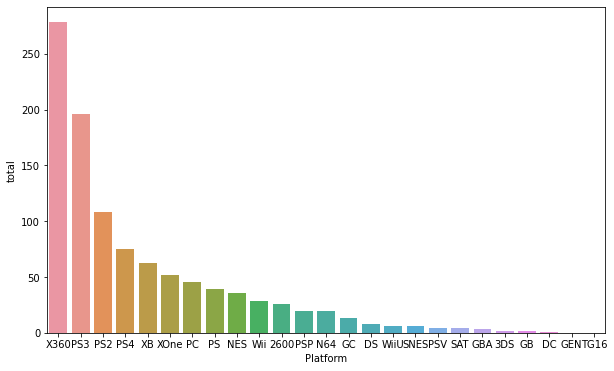

In [76]:
#shooter을 가장 잘 지원해줄 수 있는 platform은??

shooter_platform = pd.DataFrame(big_game[big_game['Genre'] == 'Shooter'].groupby('Platform')['total'].sum().sort_values(ascending=False))
shooter_platform.reset_index(inplace = True)

plt.figure(figsize=(10,6))

sns.barplot(
    x='Platform',
    y='total',
    data=shooter_platform
);

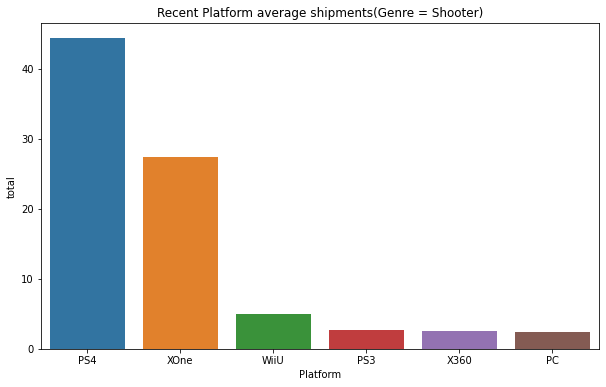

In [142]:
# 최근 shooter게임을 가장 많이 지원한 게임
shooter_platform_recent = big_game[big_game['Year'] >= 2015]
shooter_platform_recent = pd.DataFrame(shooter_platform_recent[shooter_platform_recent['Genre'] == 'Shooter'].groupby('Platform')['total'].sum().sort_values(ascending=False))
shooter_platform_recent.reset_index(inplace = True)
shooter_platform_recent
plt.figure(figsize=(10,6))

sns.barplot(
    x='Platform',
    y='total',
    data=shooter_platform_recent
).set(title='Recent Platform average shipments(Genre = Shooter)');

# 결론

- 한정된 자원 안에서 미국 시장을 겨냥하는 것이 합리적으로 보인다.
- Shooter 장르를 선택한다. 
- 지금까지 X360에서 가장 많은 Shooter장르를 출판했지만
- 최근 PS4에서 Shooter 장르를 가장 많이 출판하고 있다.
- 예전 게임과 지금의 게임은 기술적인 차이가 있다(그래픽 차이가 대표적) 따라서 최근에 Shooter게임을 가장 많이 지원한 플랫폼을 선택하는게 합리적이다.
- 또한 평균 출고량이 높아 다른 장르를 플레이 하는 사용자들에게 간접적으로 광고가 될 수 있다.
- 